In [2]:

import pandas as pd    
data = pd.read_csv("E:\\2020\\Quarantine\\Python\\bike_sharing_hourly.csv", index_col=0)#index_col is used to remove indexing here
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data[['temp','hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [7]:
# AutoCorrelation: measuring relationship with  variable current value to the past value
    #i.e. Self correlation with time lag
    #AutoCorrelation  = [-1,1]
    
data['temp'].autocorr(lag=2) # => that the temp 2 hrs ago is good predictor of present temp

0.980684914901323

In [8]:
data['temp'].autocorr(lag=12) #=> day and night 
                                #when we increase lag we find that correlation decreases with lag

0.8250709628213121

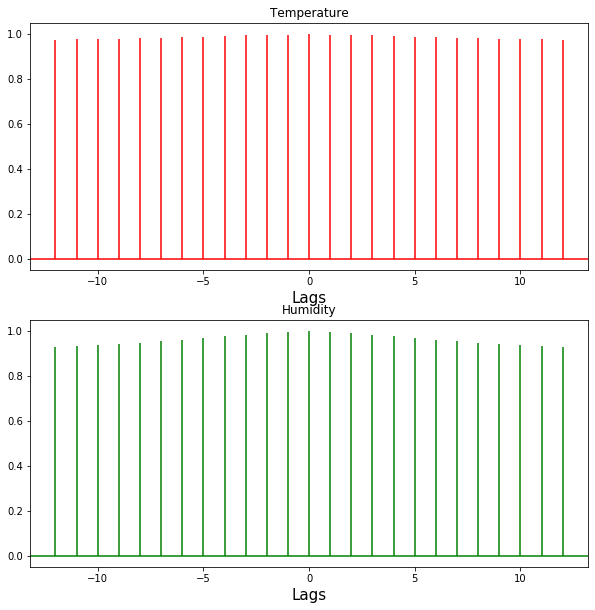

In [18]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.acorr(data['temp'], maxlags = 12, color = 'red')
ax1.title.set_text("Temperature")
ax1.set_xlabel('Lags', fontsize = 15)

ax2.acorr(data['hum'], maxlags = 12, color = 'green')
ax2.title.set_text("Humidity")
ax2.set_xlabel('Lags', fontsize = 15)

plt.show()

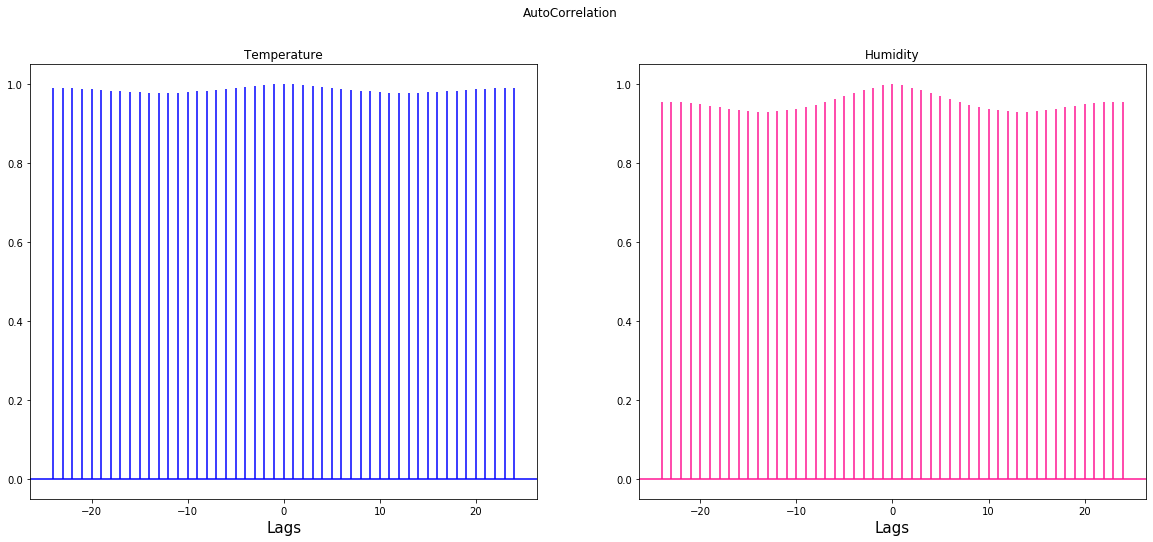

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.acorr(data['temp'], maxlags = 24, color = 'blue')
ax1.title.set_text("Temperature")
ax1.set_xlabel('Lags', fontsize = 15)

ax2.acorr(data['hum'], maxlags = 24, color = 'deeppink')
ax2.title.set_text("Humidity")
ax2.set_xlabel('Lags', fontsize = 15)

plt.suptitle("AutoCorrelation")
plt.show() 
        #=> Temperature is strongly correlated within a day
        # Humidity is not very strongly correlated within a day

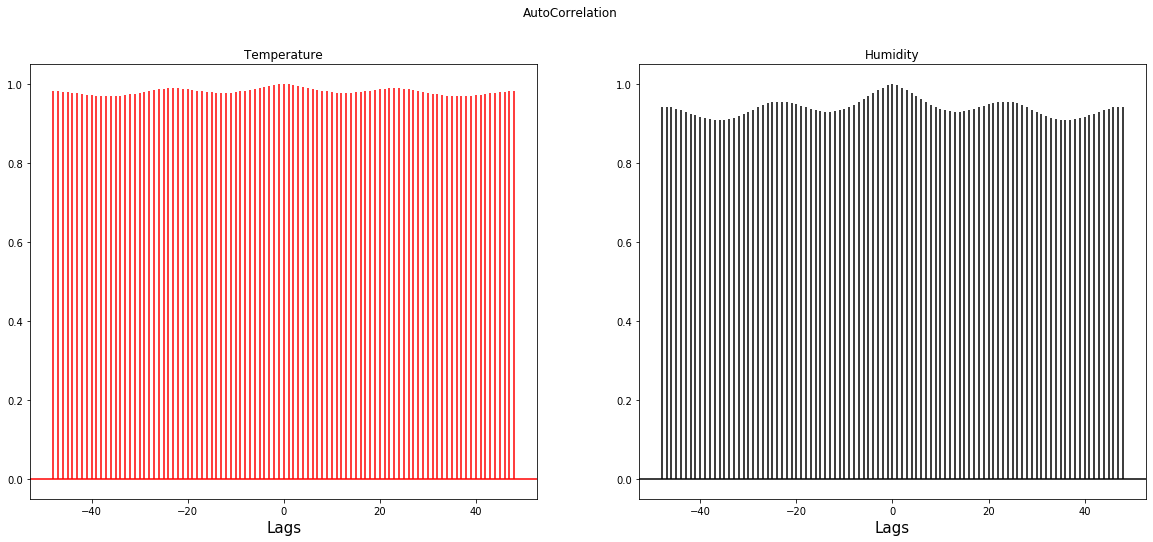

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.acorr(data['temp'], maxlags = 48, color = 'red')
ax1.title.set_text("Temperature")
ax1.set_xlabel('Lags', fontsize = 15)

ax2.acorr(data['hum'], maxlags = 48, color = 'black')
ax2.title.set_text("Humidity")
ax2.set_xlabel('Lags', fontsize = 15)

plt.suptitle("AutoCorrelation")
plt.show() 